In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rm
from __future__ import division
import operator
%matplotlib inline

Functions:

In [2]:
#scrambles the edge directions for undirected graphs, used to better randomize graph transformations.
def scramble_edges(g):
    k = rm.random()
    for source, target in g.edges():
        if k <= .5:
            g.remove_edge(source,target)
            g.add_edge(target,source)
    return g

In [3]:
def cal_giant_comp(g):
    #from https://networkx.github.io/documentation/networkx-1.9/examples/drawing/giant_component.html?highlight=giant%20component
    connected_comps = sorted(nx.connected_component_subgraphs(g), key = len, reverse=True)
    giant_comp = connected_comps[0]
    return giant_comp

Graphs:

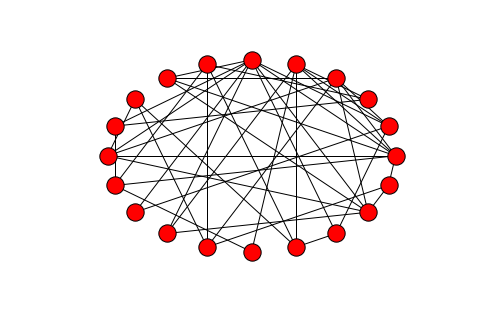

In [4]:
def make_erdos_renyi(n,p):
    
    #init graph
    g = nx.Graph()
    
    #init nodes
    for i in range(n):
        g.add_node(i)
        
    #init edges
    for i in range(n):
        for j in range(n):
            m = rm.random()
            if (m <= p) and not (m == n):
                g.add_edge(i,j)
    return scramble_edges(g)

network_erdos =  make_erdos_renyi(20, 0.10)
nx.draw_circular(network_erdos)
plt.show()

In [5]:
def add_shortcuts(g):
    shortcuts_to_add = int(g.number_of_nodes()/2.0)
    nodes = g.nodes()
    #for i in range(shortcuts_to_add):
    shortcut_edges_added = 0
    while shortcut_edges_added < shortcuts_to_add:
        a = rm.choice(nodes)
        b = rm.choice(nodes)
        if a != b and not g.has_edge(a,b):
            g.add_edge(a,b)
            shortcut_edges_added += 1
    return g

In [6]:
def make_ring(N):
    g = nx.Graph()
    for i in range(N):
        g.add_edge(i, (i+1)%N)
        g.add_edge(i, (i+2)%N)

    return add_shortcuts(g)

Removes Nodes:

In [7]:
def sum_list(l):
    s = 0
    for i in l:
        s += l[i]
    return s

In [98]:
def remove_random_nodes(g):
    avg_degree = {}
    giant_comp = {}
    number_comp = {}
    #avg_shortest_path = {}
    i = 1
    giantc = g.copy()
    while nx.number_of_nodes(g) > 0:
        avg_degree[i] = sum_list(nx.degree(g))/(nx.number_of_nodes(g))
        giant_comp[i] = nx.number_of_nodes(cal_giant_comp(g))/(nx.number_of_nodes(giantc))
        number_comp[i] = len(sorted(nx.connected_component_subgraphs(g), key = len, reverse=True))
        #avg_shortest_path[i] = nx.average_shortest_path_length(cal_giant_comp(g))
        i+=1
        
        m = rm.choice(g.nodes())
        g.remove_node(m)
        
    return avg_degree,giant_comp,number_comp

In [99]:
def remove_highest_degree_nodes(g):
    avg_degree = {}
    giant_comp = {}
    number_comp = {}
    #avg_shortest_path = {}
    i = 1
    
    giantc = cal_giant_comp(g)
    while nx.number_of_nodes(g) > 0:
        avg_degree[i] = sum_list(nx.degree(g))/(nx.number_of_nodes(g))
        giant_comp[i] = nx.number_of_nodes(cal_giant_comp(g))/(nx.number_of_nodes(giantc))
        number_comp[i] = len(sorted(nx.connected_component_subgraphs(g), key = len, reverse=True))
        #avg_shortest_path[i] = nx.average_shortest_path_length(cal_giant_comp(g))
        i+=1
        
        m = max(nx.degree(g).iteritems(), key=operator.itemgetter(1))[0]
        g.remove_node(m)
        
    return avg_degree,giant_comp,number_comp

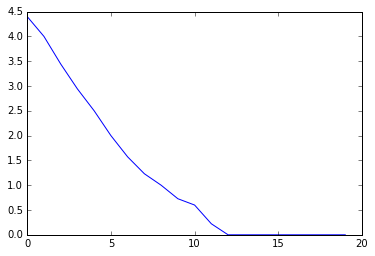

In [61]:
network_erdos =  make_erdos_renyi(20, 0.1)
avg_degree,giant_comp,number_comp = remove_highest_degree_nodes(network_erdos)
plt.plot(avg_degree.values())

### from http://stackoverflow.com/questions/8528178/list-of-zeros-in-python
def zerolistmaker(n):
    listofzeros = [0.0] * n
    return listofzeros

In [12]:
def run_random_removal_ER(N,p,r): # N is the number of nodes in the ER graphs, 
                                    # p is the probibilty of an edge, and r is the number of runs.
    g = make_erdos_renyi(N, p)
    g_prime = cal_giant_comp(g)
    ravg_degree = zerolistmaker(nx.number_of_nodes(g))
    rgiant_comp = zerolistmaker(nx.number_of_nodes(g))
    rnumber_comp = zerolistmaker(nx.number_of_nodes(g))

    
    for i in range(1,r):
        avg_degree,giant_comp,rnumber_comp = remove_random_nodes(g_prime)
        ravg_degree = [x + y for x, y in zip(ravg_degree, avg_degree.values())]
        rgiant_comp = [x + y for x, y in zip(rgiant_comp, giant_comp.values())]
        #rnumber_comp = [x + y for x, y in zip(rnumber_comp, number_comp)]
        g_prime = make_erdos_renyi(N, p)
        
    for j in range(0,nx.number_of_nodes(g)):
        ravg_degree[j] = ravg_degree[j]/r
        rgiant_comp[j] = rgiant_comp[j]/r
        #rnumber_comp[j] = rnumber_comp[j]/r
        
    
    return ravg_degree, rgiant_comp, rnumber_comp

In [13]:
def run_attack_removal_ER(N,p,r): # N is the number of nodes in the ER graphs, 
                                    # p is the probibilty of an edge, and r is the number of runs.
    g = make_erdos_renyi(N, p)
    g_prime = g.copy()
    ravg_degree = zerolistmaker(nx.number_of_nodes(g))
    rgiant_comp = zerolistmaker(nx.number_of_nodes(g))
    rnumber_comp = zerolistmaker(nx.number_of_nodes(g))

    
    for i in range(1,r):
        avg_degree,giant_comp,rnumber_comp = remove_highest_degree_nodes(g_prime)
        ravg_degree = [x + y for x, y in zip(ravg_degree, avg_degree.values())]
        rgiant_comp = [x + y for x, y in zip(rgiant_comp, giant_comp.values())]
        #rnumber_comp = [x + y for x, y in zip(rnumber_comp, number_comp)]
        g_prime = make_erdos_renyi(N, p)
        
    for j in range(0,nx.number_of_nodes(g)):
        ravg_degree[j] = ravg_degree[j]/r
        rgiant_comp[j] = rgiant_comp[j]/r
        #rnumber_comp[j] = rnumber_comp[j]/r
        
    
    return ravg_degree, rgiant_comp, rnumber_comp

In [72]:
def run_random_removal_WS(N,k,p,r): # N is the number of nodes in the ER graphs, 
                                    # p is the probibilty of an edge, and r is the number of runs.
    g = nx.watts_strogatz_graph(N,k,p)
    g_prime = g.copy()
    ravg_degree = zerolistmaker(nx.number_of_nodes(g))
    rgiant_comp = zerolistmaker(nx.number_of_nodes(g))
    rnumber_comp = zerolistmaker(nx.number_of_nodes(g))

    
    for i in range(1,r):
        avg_degree,giant_comp,rnumber_comp = remove_random_nodes(g_prime)
        ravg_degree = [x + y for x, y in zip(ravg_degree, avg_degree.values())]
        rgiant_comp = [x + y for x, y in zip(rgiant_comp, giant_comp.values())]
        #rnumber_comp = [x + y for x, y in zip(rnumber_comp, number_comp)]
        g_prime = nx.watts_strogatz_graph(N,k,p)
        
    for j in range(0,nx.number_of_nodes(g)):
        ravg_degree[j] = ravg_degree[j]/r
        rgiant_comp[j] = rgiant_comp[j]/r
        #rnumber_comp[j] = rnumber_comp[j]/r
        
    
    return ravg_degree, rgiant_comp, rnumber_comp

In [73]:
def run_attack_removal_WS(N,k,p,r): # N is the number of nodes in the ER graphs, 
                                    # p is the probibilty of an edge, and r is the number of runs.
    g = nx.watts_strogatz_graph(N,k,p)
    g_prime = g.copy()
    ravg_degree = zerolistmaker(nx.number_of_nodes(g))
    rgiant_comp = zerolistmaker(nx.number_of_nodes(g))
    rnumber_comp = zerolistmaker(nx.number_of_nodes(g))

    
    for i in range(1,r):
        avg_degree,giant_comp,rnumber_comp = remove_highest_degree_nodes(g_prime)
        ravg_degree = [x + y for x, y in zip(ravg_degree, avg_degree.values())]
        rgiant_comp = [x + y for x, y in zip(rgiant_comp, giant_comp.values())]
        #rnumber_comp = [x + y for x, y in zip(rnumber_comp, number_comp)]
        g_prime = nx.watts_strogatz_graph(N,k,p)
        
    for j in range(0,nx.number_of_nodes(g)):
        ravg_degree[j] = ravg_degree[j]/r
        rgiant_comp[j] = rgiant_comp[j]/r
        #rnumber_comp[j] = rnumber_comp[j]/r
        
    
    return ravg_degree, rgiant_comp, rnumber_comp

In [16]:
def run_random_removal_BA(N,m,r): # N is the number of nodes in the ER graphs, 
                                  # p is the probibilty of an edge, and r is the number of runs.
    g = nx.barabasi_albert_graph(N,m)
    g_prime = g.copy()
    ravg_degree = zerolistmaker(nx.number_of_nodes(g))
    rgiant_comp = zerolistmaker(nx.number_of_nodes(g))
    rnumber_comp = zerolistmaker(nx.number_of_nodes(g))

    
    for i in range(1,r):
        avg_degree,giant_comp,rnumber_comp = remove_random_nodes(g_prime)
        ravg_degree = [x + y for x, y in zip(ravg_degree, avg_degree.values())]
        rgiant_comp = [x + y for x, y in zip(rgiant_comp, giant_comp.values())]
        #rnumber_comp = [x + y for x, y in zip(rnumber_comp, number_comp)]
        g_prime = nx.barabasi_albert_graph(N,m)
        
    for j in range(0,nx.number_of_nodes(g)):
        ravg_degree[j] = ravg_degree[j]/r
        rgiant_comp[j] = rgiant_comp[j]/r
        #rnumber_comp[j] = rnumber_comp[j]/r
        
    
    return ravg_degree, rgiant_comp, rnumber_comp

In [17]:
def run_attack_removal_BA(N,m,r): # N is the number of nodes in the ER graphs, 
                                    # p is the probibilty of an edge, and r is the number of runs.
    g = nx.barabasi_albert_graph(N,m)
    g_prime = g.copy()
    ravg_degree = zerolistmaker(nx.number_of_nodes(g))
    rgiant_comp = zerolistmaker(nx.number_of_nodes(g))
    rnumber_comp = zerolistmaker(nx.number_of_nodes(g))

    
    for i in range(1,r):
        avg_degree,giant_comp,rnumber_comp = remove_highest_degree_nodes(g_prime)
        ravg_degree = [x + y for x, y in zip(ravg_degree, avg_degree.values())]
        rgiant_comp = [x + y for x, y in zip(rgiant_comp, giant_comp.values())]
        #rnumber_comp = [x + y for x, y in zip(rnumber_comp, number_comp)]
        g_prime = nx.barabasi_albert_graph(N,m)
        
    for j in range(0,nx.number_of_nodes(g)):
        ravg_degree[j] = ravg_degree[j]/r
        rgiant_comp[j] = rgiant_comp[j]/r
        #rnumber_comp[j] = rnumber_comp[j]/r
        
    
    return ravg_degree, rgiant_comp, rnumber_comp

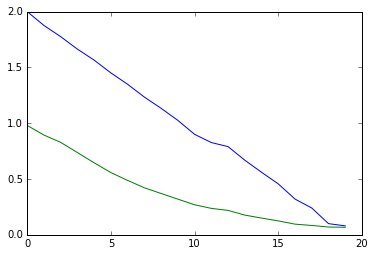

In [49]:
avg_degree,giant_comp,number_comp = run_random_removal_ER(20,0.05,50)
plt.plot(avg_degree)
plt.plot(giant_comp)

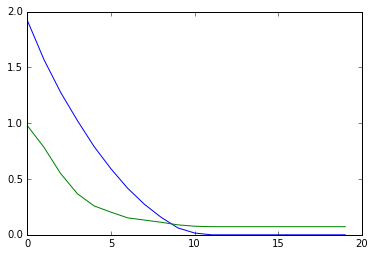

In [48]:
avg_degree,giant_comp,number_comp = run_attack_removal_ER(20,0.05,50)
plt.plot(avg_degree)
plt.plot(giant_comp)

In [1]:
avg_degree1,giant_comp1,number_comp1 = run_random_removal_ER(50,0.01,50)
avg_degree2,giant_comp2,number_comp2 = run_attack_removal_ER(50,0.01,50)
#plt.plot(avg_degree)
plt.plot(giant_comp1)
plt.plot(giant_comp2)
plt.xlabel("nodes removed")
plt.ylabel("S")
plt.title("S in ER with P < 1/N: Attack vs Random")



NameError: name 'run_random_removal_ER' is not defined

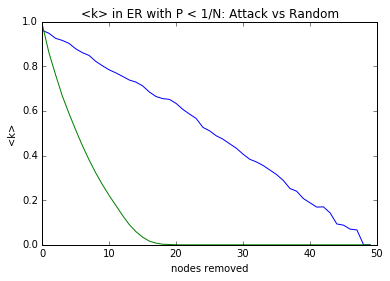

In [101]:
plt.plot(avg_degree1)
plt.plot(avg_degree2)
plt.xlabel("nodes removed")
plt.ylabel("<k>")
plt.title("<k> in ER with P < 1/N: Attack vs Random")

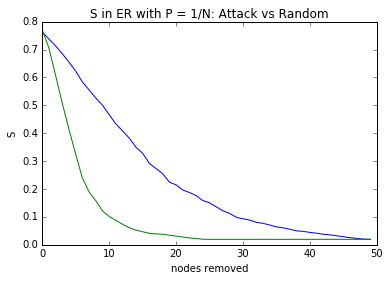

In [102]:
avg_degree1,giant_comp1,number_comp1 = run_random_removal_ER(50,1/50,50)
avg_degree2,giant_comp2,number_comp2 = run_attack_removal_ER(50,1/50,50)
#plt.plot(avg_degree)
plt.plot(giant_comp1)
plt.plot(giant_comp2)
plt.xlabel("nodes removed")
plt.ylabel("S")
plt.title("S in ER with P = 1/N: Attack vs Random")

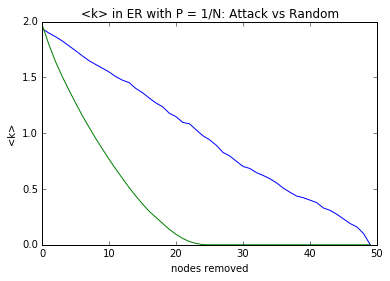

In [103]:
plt.plot(avg_degree1)
plt.plot(avg_degree2)
plt.xlabel("nodes removed")
plt.ylabel("<k>")
plt.title("<k> in ER with P = 1/N: Attack vs Random")

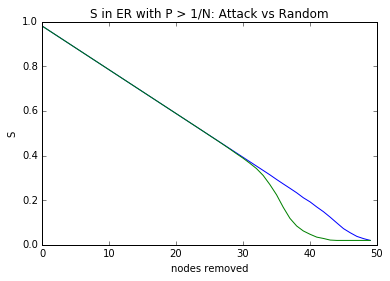

In [104]:
avg_degree1,giant_comp1,number_comp1 = run_random_removal_ER(50,0.2,50)
avg_degree2,giant_comp2,number_comp2 = run_attack_removal_ER(50,0.2,50)
#plt.plot(avg_degree)
plt.plot(giant_comp1)
plt.plot(giant_comp2)
plt.xlabel("nodes removed")
plt.ylabel("S")
plt.title("S in ER with P > 1/N: Attack vs Random")

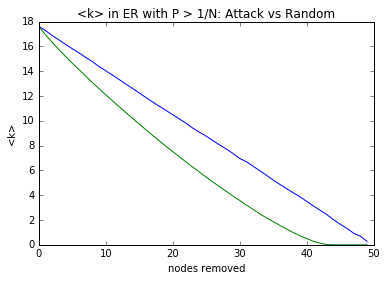

In [105]:
plt.plot(avg_degree1)
plt.plot(avg_degree2)
plt.xlabel("nodes removed")
plt.ylabel("<k>")
plt.title("<k> in ER with P > 1/N: Attack vs Random")

In [ ]:
avg_degree1,giant_comp1,number_comp1 = run_random_removal_WS(50,2,0.1,50)
avg_degree2,giant_comp2,number_comp2 = run_attack_removal_WS(50,2,0.1,50)
#plt.plot(avg_degree)
plt.plot(giant_comp1)
plt.plot(giant_comp2)
plt.xlabel("nodes removed")
plt.ylabel("S")
plt.title("S in WS with k=2,p=0.1: Attack vs Random")

In [ ]:
plt.plot(avg_degree1)
plt.plot(avg_degree2)
plt.xlabel("nodes removed")
plt.ylabel("<k>")
plt.title("<k> in WS with k=2,p=0.1: Attack vs Random")

In [ ]:
avg_degree1,giant_comp1,number_comp1 = run_random_removal_WS(50,4,0.1,50)
avg_degree2,giant_comp2,number_comp2 = run_attack_removal_WS(50,4,0.1,50)
#plt.plot(avg_degree)
plt.plot(giant_comp1)
plt.plot(giant_comp2)
plt.xlabel("nodes removed")
plt.ylabel("S")
plt.title("S in WS with k=4,p=0.1: Attack vs Random")

In [ ]:
plt.plot(avg_degree1)
plt.plot(avg_degree2)
plt.xlabel("nodes removed")
plt.ylabel("<k>")
plt.title("<k> in WS with k=4,p=0.1: Attack vs Random")

In [ ]:
avg_degree1,giant_comp1,number_comp1 = run_random_removal_WS(50,2,0.01,50)
avg_degree2,giant_comp2,number_comp2 = run_attack_removal_WS(50,2,0.01,50)
#plt.plot(avg_degree)
plt.plot(giant_comp1)
plt.plot(giant_comp2)
plt.xlabel("nodes removed")
plt.ylabel("S")
plt.title("S in WS with k=2,p=0.01: Attack vs Random")

In [ ]:
plt.plot(avg_degree1)
plt.plot(avg_degree2)
plt.xlabel("nodes removed")
plt.ylabel("<k>")
plt.title("<k> in WS with k=2,p=0.01: Attack vs Random")

In [ ]:
avg_degree1,giant_comp1,number_comp1 = run_random_removal_BA(20,1,50)
avg_degree2,giant_comp2,number_comp2 = run_attack_removal_BA(20,1,50)
#plt.plot(avg_degree)
plt.plot(giant_comp1)
plt.plot(giant_comp2)
plt.xlabel("nodes removed")
plt.ylabel("S")
plt.title("S in BA: Attack vs Random")

In [ ]:
plt.plot(avg_degree1)
plt.plot(avg_degree2)
plt.xlabel("nodes removed")
plt.ylabel("<k>")
plt.title("<k> in BA: Attack vs Random")